# Fire up pandas

In [1]:
import pandas as pd

Let's read the data set

In [2]:
data = pd.read_csv("data-1716191272369.csv")
data.head()

,id,text
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN"
2,1741579995263144216,עבר יום
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148893 entries, 0 to 148892
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      148893 non-null  int64 
 1   text    148893 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


So no nulls with only two columns
# Length
Let's see what is legth distribution for the tweets

In [4]:
data["length"] = data["text"].str.len()
data.head()

,id,text,length
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי,26
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN",48
2,1741579995263144216,עבר יום,7
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭,37
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...,124


In [5]:
data["length"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    148893.000000
mean         95.498888
std          74.432324
min           1.000000
5%           20.000000
25%          41.000000
50%          70.000000
75%         132.000000
95%         275.000000
max         729.000000
Name: length, dtype: float64

In [6]:
data.query("length < 20").head(20)

,id,text,length
2,1741579995263144216,עבר יום,7
11,1741580005606310286,@zacaiha 🙏🏻🙏🏻\nגם לל,19
15,1741580016880619681,יופי חג שמח,11
17,1741580028695982100,@shalomswi13 משו 😇,18
18,1741580031057379402,מזל 2024,8
20,1741580035419480299,@StavShaffir אמן,16
22,1741580044844081595,כן.,3
25,1741580052154790049,האפי ניו ייר לכם 🥳,18
30,1741580072677519656,שנה זבל,7
41,1741580119867547929,@netanyahu תתפטר,16


Most of the tweets are between 20 charercters to 275. Those small tweet are mosly replies which we will ignore. Let's look at the histogram:

In [7]:
import matplotlib.pyplot as plt

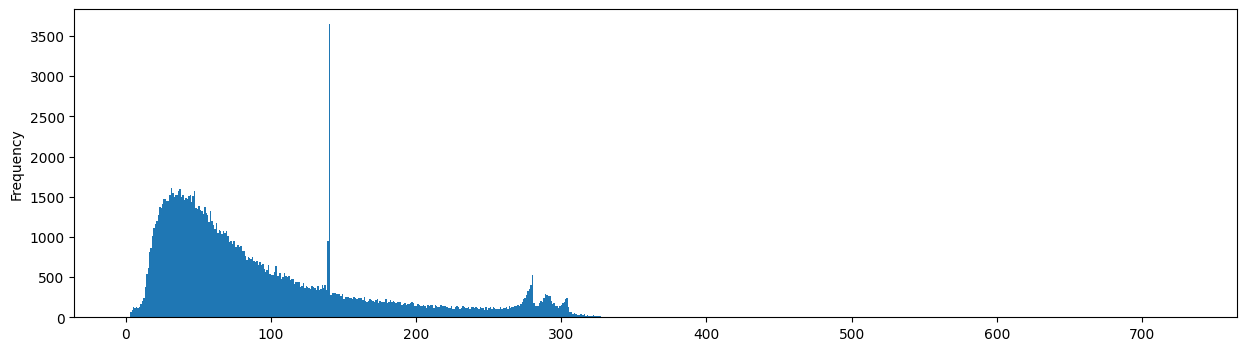

In [8]:
data["length"].plot(kind="hist", legend=False, bins=729)
figure = plt.gcf()
figure.set_size_inches(15, 4)
plt.show()

In [9]:
data["length"].value_counts().head(1)

length
140    3649
Name: count, dtype: int64

We can see that we have a spike in 140 legnth, which is limited the original Tweet length.

# Mentions and Hashtags
Let's see how many tweet have mentions of other users and how many have hashtags

In [10]:
data['has_mention'] = data['text'].str.contains('@').astype(int)
data['has_hashtag'] = data['text'].str.contains('#').astype(int)
data.head()

,id,text,length,has_mention,has_hashtag
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי,26,0,0
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN",48,0,0
2,1741579995263144216,עבר יום,7,0,0
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭,37,0,0
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...,124,0,1


In [11]:
data['has_mention'].value_counts(normalize=True)

has_mention
1    0.791085
0    0.208915
Name: proportion, dtype: float64

about 80% include a mention to another user

In [12]:
data['has_hashtag'].value_counts(normalize=True)

has_hashtag
0    0.987481
1    0.012519
Name: proportion, dtype: float64

about 99% has a hashtag in the tweet

# Cleaning
Let's clean the text in order to try and extract more statstics:

In [13]:
import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Idan
[nltk_data]     Morad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Idan
[nltk_data]     Morad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('hebrew'))

def clean_hebrew_tweet(text):
  tokens = word_tokenize(text)

  # Remove stop words
  tokens = [token for token in tokens if (token not in stop_words) and (len(token) > 1)]

  # Remove punctuation
  tokens = [token for token in tokens if (token.isalnum()) and (token not in string.punctuation)]

  cleaned_text = " ".join(tokens).strip()

  return cleaned_text

In [16]:
emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )

url_pattern = re.compile(r'http\S+|www\.\S+')

data["clean_text"] = data["text"].str.replace(url_pattern, '', regex=True).str.replace(emoji_pattern, '', regex=True).apply(clean_hebrew_tweet)
data.head()

,id,text,length,has_mention,has_hashtag,clean_text
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי,26,0,0,וואי עברה שנה מאז שהתקלחתי
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN",48,0,0,הי יאיר 2024 מוסרת
2,1741579995263144216,עבר יום,7,0,0,עבר יום
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭,37,0,0,מאמין ש2016 הייתה 12 שנה
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...,124,0,1,אוכלים בשעה מאוחרת בלילה כדאי שתדעו לקריאת הכת...


we can see that the word ד"ש has clean out, probably word other words that are abbreviations with two letter also gone. Let's look at the number of token per tweet now that they are clean:

In [17]:
data["token_num"] = data["clean_text"].str.split().str.len()
data.head()

,id,text,length,has_mention,has_hashtag,clean_text,token_num
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי,26,0,0,וואי עברה שנה מאז שהתקלחתי,5
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN",48,0,0,הי יאיר 2024 מוסרת,4
2,1741579995263144216,עבר יום,7,0,0,עבר יום,2
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭,37,0,0,מאמין ש2016 הייתה 12 שנה,5
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...,124,0,1,אוכלים בשעה מאוחרת בלילה כדאי שתדעו לקריאת הכת...,9


In [18]:
data["token_num"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    148893.000000
mean         11.587146
std           9.941844
min           0.000000
5%            2.000000
25%           4.000000
50%           8.000000
75%          16.000000
95%          35.000000
max          57.000000
Name: token_num, dtype: float64

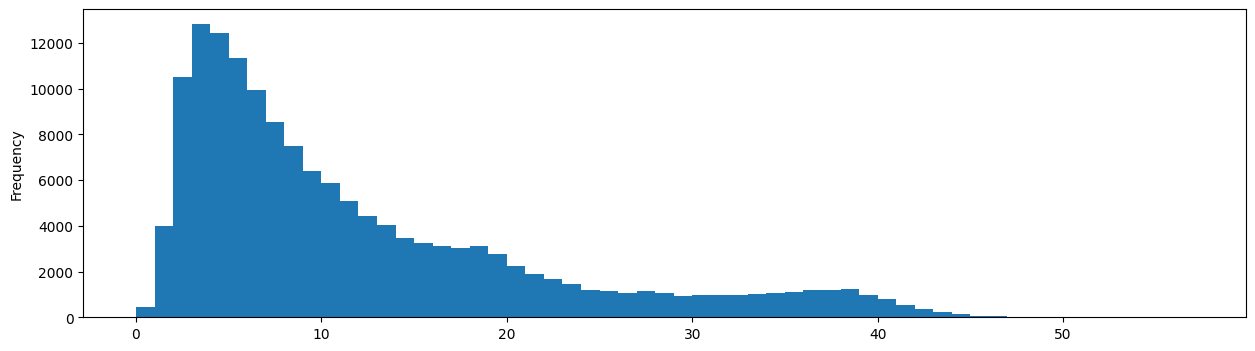

In [19]:
data["token_num"].plot(kind="hist", legend=False, bins=57)
figure = plt.gcf()
figure.set_size_inches(15, 4)
plt.show()

There are tweets with zero tokens after cleaning which we will have to drop. Most tweets has between 2 to 36 words in them.

Let's make the data more presentable:

In [20]:
clean_data = data.query("(length >= 20) & (token_num > 2)").copy(deep=True)
clean_data.shape[0]

132942

So we are left with about 90% of the data.
# Frequent Words

In [21]:
from collections import Counter

In [22]:
word_frequencies = Counter(clean_data["clean_text"].str.split().explode().tolist())
word_frequencies.most_common(10)

[('לך', 7206),
 ('ישראל', 6532),
 ('RT', 6506),
 ('שלא', 5405),
 ('עוד', 4864),
 ('ולא', 4832),
 ('אחד', 4792),
 ('הזה', 4666),
 ('כבר', 4462),
 ('כמה', 3953)]

So our top 10 words are pretty much generic. We have the 'RT' token which means retweet and thus we need to see it as a stopword.

In [23]:
stop_words = set(stopwords.words('hebrew') + ['RT'])

def clean_hebrew_tweet_2(text):
  tokens = word_tokenize(text)

  # Remove stop words
  tokens = [token for token in tokens if (token not in stop_words) and (len(token) > 1)]

  # Remove punctuation
  tokens = [token for token in tokens if (token.isalnum()) and (token not in string.punctuation)]

  cleaned_text = " ".join(tokens).strip()

  return cleaned_text

In [24]:
clean_data["clean_text"] = clean_data["text"].str.replace(url_pattern, '', regex=True).str.replace(
    emoji_pattern, '', regex=True).apply(clean_hebrew_tweet_2)

In [25]:
word_frequencies = Counter(clean_data["clean_text"].str.split().explode().tolist())
word_frequencies.most_common(10)

[('לך', 7206),
 ('ישראל', 6532),
 ('שלא', 5405),
 ('עוד', 4864),
 ('ולא', 4832),
 ('אחד', 4792),
 ('הזה', 4666),
 ('כבר', 4462),
 ('כמה', 3953),
 ('צריך', 3941)]

# Finding the Best LDA

In [26]:
from gensim.corpora import Dictionary

In [27]:
dictionary = Dictionary(clean_data["clean_text"].str.split())
corpus = [dictionary.doc2bow(text) for text in clean_data["clean_text"].str.split()]

In [28]:
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from tqdm import tqdm

In [29]:
results = []

In [30]:
for num_topics in tqdm(range(2, 26)):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    coherencemodel = CoherenceModel(model=model, texts=clean_data["clean_text"].str.split(), dictionary=dictionary, coherence='c_v')
    perplexity = model.log_perplexity(corpus)
    results.append({"num_topics": num_topics, "Coherence Score": coherencemodel.get_coherence(), "perplexity": perplexity / num_topics, "model": model})

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [37:39<00:00, 94.14s/it]


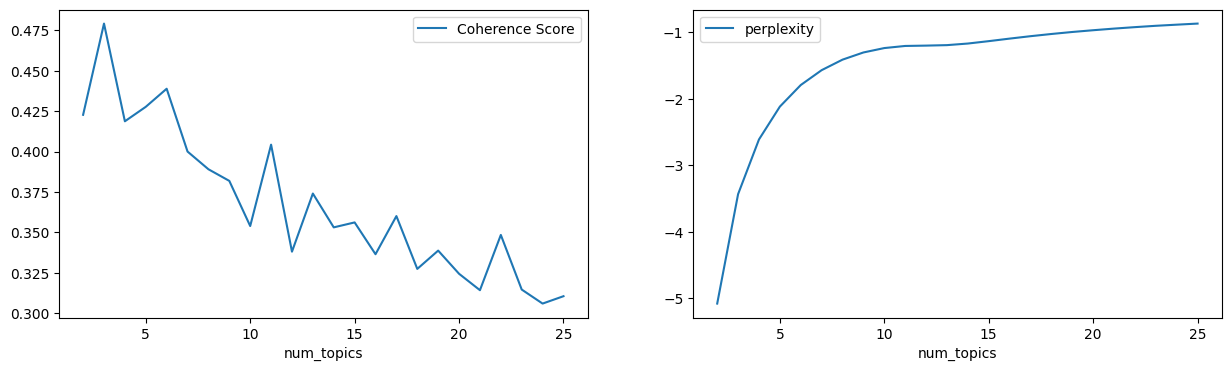

In [31]:
results_df = pd.DataFrame(results)
fig, (ax1, ax2) = plt.subplots(1, 2)
results_df.plot(kind="line", x="num_topics", y="Coherence Score", ax=ax1)
results_df.plot(kind="line", x="num_topics", y="perplexity", ax=ax2)
fig.set_size_inches(15, 4)
plt.show()

Based on the normalized perplexity metric minimum and maximun coherence metric at that same area, I would say that 11 topics is a good astimate for the topic number in this data set.

Let's assign each tweet what is the index of the most dominant topic:

In [32]:
chosen_model = results[9]["model"] # the model with 11 topic in at the 9th place as the count started from 2
dominant_topics = []
for i, row in enumerate(chosen_model[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    dominant_topic = row[0][0] + 1 #fixing the topic number to be like pyLDAvis
    dominant_topics.append(dominant_topic)
clean_data['dominant_topic'] = dominant_topics
clean_data.head()

,id,text,length,has_mention,has_hashtag,clean_text,token_num,dominant_topic
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי,26,0,0,וואי עברה שנה מאז שהתקלחתי,5,11
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN",48,0,0,הי יאיר 2024 מוסרת,4,4
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭,37,0,0,מאמין ש2016 הייתה 12 שנה,5,3
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...,124,0,1,אוכלים בשעה מאוחרת בלילה כדאי שתדעו לקריאת הכת...,9,4
5,1741579998710890870,עתידות: \nביום רביעי חיפה תתן ארבע חתכה להפועל...,79,0,0,עתידות ביום רביעי חיפה תתן ארבע חתכה להפועל ומ...,12,5


Let's what are most dominant topics:

In [33]:
clean_data["dominant_topic"].value_counts(normalize=True).sort_values(ascending=False)

dominant_topic
2     0.154880
9     0.144680
8     0.119631
1     0.114727
10    0.079508
3     0.075108
6     0.074092
4     0.072468
11    0.056303
5     0.056137
7     0.052466
Name: proportion, dtype: float64

I will take all the topics that are above 10% in the population:

In [34]:
chosen_topics = clean_data["dominant_topic"].value_counts(normalize=True).sort_values(ascending=False).reset_index().query("proportion > 0.1")["dominant_topic"].tolist()
chosen_topics

[2, 9, 8, 1]

Now the users already defined for us the topic using the hashtags, as 99% of the tweets has them (see above). So will use it. First let's extract those hastags:

In [35]:
clean_data["hashtags"] = clean_data["text"].apply(lambda x: re.findall(r'#\w+', x))
clean_data.head()

,id,text,length,has_mention,has_hashtag,clean_text,token_num,dominant_topic,hashtags
0,1741579989613429166,וואי עברה שנה מאז שהתקלחתי,26,0,0,וואי עברה שנה מאז שהתקלחתי,5,11,[]
1,1741579996819542406,"הי יאיר, 2024 מוסרת ד""ש. https://t.co/6nGzr3PvcN",48,0,0,הי יאיר 2024 מוסרת,4,4,[]
3,1741579995368370402,אני לא מאמין ש2016 הייתה לפני 12 שנה😭,37,0,0,מאמין ש2016 הייתה 12 שנה,5,3,[]
4,1741579996026548326,גם אתם אוכלים בשעה מאוחרת בלילה ... כדאי שתדעו...,124,0,1,אוכלים בשעה מאוחרת בלילה כדאי שתדעו לקריאת הכת...,9,4,[#יופי]
5,1741579998710890870,עתידות: \nביום רביעי חיפה תתן ארבע חתכה להפועל...,79,0,0,עתידות ביום רביעי חיפה תתן ארבע חתכה להפועל ומ...,12,5,[]


Now let's find for each topic what is their hash tags:

In [36]:
top_topics_names = {}
for topic in chosen_topics:
    topic_hashtags = [hashtag for hashtags in clean_data.query("dominant_topic == @topic")['hashtags'] for hashtag in hashtags]
    for i in range(1, 10):
        most_common_hashtag = Counter(topic_hashtags).most_common(i)[0][0]
        topic_name = most_common_hashtag.replace('#', '').replace('_', ' ')
        if topic_name not in top_topics_names.values():
            top_topics_names[topic] = topic_name
            break
for topic, topic_name in top_topics_names.items():
    print(f"Topic {topic} Name: {topic_name}")

Topic 2 Name: היא שרה
Topic 9 Name: ביביסטים הם כסילים
Topic 8 Name: TikTok
Topic 1 Name: רקמראה


In [37]:
from gensim.corpora import MmCorpus

In [38]:
chosen_model.save('lda_model.model')
dictionary.save('lda_dictionary.dict')
MmCorpus.serialize('corpus.mm', corpus)
clean_data.to_csv("data_clean.csv", index=False)